# Apprendre à reproduire une image avec un algorithme génétique

On commence par importer les dépendances du projet.

In [1]:
import sys
from platypus import Problem, Real, NSGAII
import matplotlib.pyplot as plt

from skimage.draw import polygon
from PIL import Image, ImageDraw

On charge l'image à reproduire.

la variable **NB_POLYGONS** permet de choisir combien de polygon seront utilisés pour reproduire l'image.

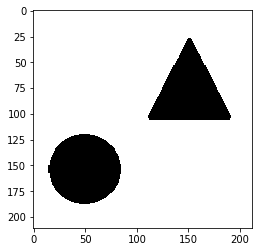

In [2]:
img_original = plt.imread('figures_black.png')
WIDTH, HEIGHT, *_ = img_original.shape
NB_POLYGONS = 10

plt.imshow(img_original)

La fonction *makemake_image* permet de créer une image à partir de un ou plusieurs polygones.
Cette fonction attends en entrée 7 arguments par polygone (7 float compris entre 0 et 1). 
* Le premier float correspond à l'intensité du polygone (0=transparent et 1=opaque). 
* Les 3 float suivants correspondent aux coordonnées x (ligne) des sommets, normalisées entre 0 et 1.
* Les 3 float suivants correspondent aux coordonnées y (colonne) des sommets, normalisées entre 0 et 1.

Note: j'ai choisi des triangles mais vous pouvez utiliser plus de sommets en adaptant un peu le code.

La fonction *similarity* permet de calculer une similarité visuelle entre l'image originale et l'image générée.
Cette fonction attends en entrée les paramètres de *makemake_image* sous forme d'une liste.

In [3]:
def make_image(*args):
    img = np.ones(shape=(WIDTH, HEIGHT, 3), dtype=float)
    dna = list(args)
    nb_polygons = int(len(dna) / 7)

    for _ in range(nb_polygons):
        intensity, r1, r2, r3, c1, c2, c3, *dna = dna
        r = [int(r1 * WIDTH), int(r2 * WIDTH), int(r3 * WIDTH)]
        c = [int(c1 * HEIGHT), int(c2 * HEIGHT), int(c3 * HEIGHT)]
        rr, cc = polygon(r, c)
        img[rr, cc] -= intensity
        img = np.clip(img, 0, 255)

    return img

def similarity(args_list):
    img_generated = make_image(*args_list)

    return [np.power(np.sum(np.power(np.absolute(img_original - img_generated), 2)), 1./2.), ]

On créer le problème avec 7 paramètres et 1 critère à optimiser.

**NB_GENERATION** et **POPULATION_SIZE** correspondent respectivement au nombre de générations et à la taille de la population.
L'algorithme génétique utilisé est Nondominated Sorting Genetic Algorithm II (NSGA-II). Par défaut, on minimise le  critère.

In [6]:
problem = Problem(NB_POLYGONS * 7, 1)
problem.types[:] = Real(0, 1)
problem.function = similarity

NB_GENERATION = 1000
POPULATION_SIZE = 10
algorithm = NSGAII(problem, population_size=POPULATION_SIZE)
algorithm.run(NB_GENERATION * POPULATION_SIZE)

On peut récupérer les résultats de l'optimisation. Ce derniers sont ordonnés du meilleur au moins bon.
On peut affiché le résultat sous forme d'image.

38.00490431564939
[0.45026486703437996, 0.8729015170714699, 0.8885025990397034, 0.6549396977096834, 0.10451759863482213, 0.32317808311294305, 0.432127356560519, 0.4320530862427089, 0.7960547698870204, 0.8190073761317282, 0.4882146733732349, 0.47337755125199743, 0.014576766867726047, 0.20331355269611515, 0.01771549093993211, 0.5167593419810704, 0.07811159835647917, 0.46161189798626606, 0.5444087822210733, 0.6612295991456714, 0.8888050997107766, 0.47280288647506113, 0.5467545974110005, 0.6403209508884159, 0.954982721963959, 0.37496935448750696, 0.013282984055520216, 0.2219809965748752, 0.005439354095318176, 0.021394403691484123, 0.27939044029955457, 0.49230149924324174, 0.8815182197399295, 0.749606752795772, 0.29577574151165764, 0.9737039540602893, 0.5059456213780477, 0.5020316774618265, 0.11448507783136082, 0.9190316384597923, 0.5166353394865859, 0.7138667614935971, 0.5261961228106725, 0.8530492764213641, 0.8714255801957643, 0.5906906358791097, 0.055642514086296516, 0.36576748948485593,

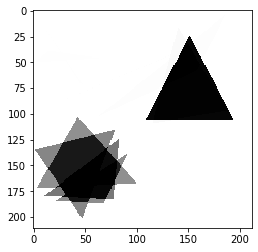

In [7]:
print(algorithm.result[0].objectives[:][0])
print([problem.types[i].decode(var) for i, var in enumerate(algorithm.result[0].variables)])
plt.imshow(make_image(*[problem.types[i].decode(var) for i, var in enumerate(algorithm.result[0].variables)]))